## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys


In [2]:
data_path = 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

I need numbers, not strings

In [4]:
from src.dataprep import prep_df
df = prep_df()
df.dropna(inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.277445,-1.160323,-0.994194
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.066327,-0.259629,-0.173740
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.236724,-0.362660,-0.959649
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.236724,0.197365,-0.940457


Now to scale the numerical columns

## Scikit Learn Imports

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['Churn'],  axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

## KNN

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_t, y_t)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [14]:
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8588888888888889
Val:
0.7582222222222222


In [17]:
y_hat = knn.predict(X_val)

In [16]:
from src.confusion import plot_confusion_matrix

[[783  59]
 [213  70]]


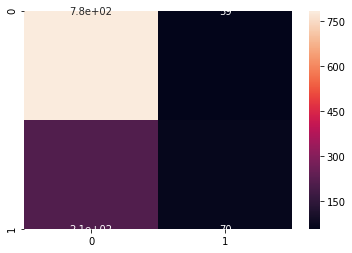

In [26]:
cf_mat = confusion_matrix(y_val, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

This works on other people's computers, why doesn't it want to behave here?

Update: this gets messed up depending on one's version of matplotlib

A little overfit, but not bad for a FSM

## Randomforest

In [15]:
rf = RandomForestClassifier()
rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.9813333333333333
Val:
0.7706666666666667


/Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
y_hat2 = rf.predict(X_val)

[[745  97]
 [161 122]]


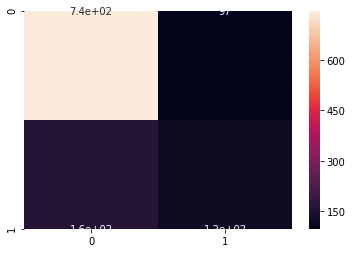

In [28]:
cf_mat = confusion_matrix(y_val, y_hat2)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

Very overfit, I'll need to use some regularization